Question 1: Consider the iris data file seeds.csv. 
A. Import the file to python
B. Perform pre processing
C. Divide the data set in 80% training and 20% testing
D. Select the RNN Neural Network
E. Perform the training of the model
F. Test the model with test data
G. Evaluate the performance of your model


In [35]:
import pandas as pd
# used to read the data set
import numpy as np
# used to do some operations with the arrays
import os
# used handle some files


In [36]:
df = pd.read_csv("Iris.csv")

In [37]:
df = pd.read_csv("Iris.csv")

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,1
96,97,5.7,2.9,4.2,1.3,1
97,98,6.2,2.9,4.3,1.3,1
98,99,5.1,2.5,3.0,1.1,1


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df.drop(columns = ['Species'])
Y = df['Species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

In [41]:
X_train=X_train.to_numpy()

In [42]:
X_train=X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [43]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [44]:
model = Sequential()
model.add(SimpleRNN(64, input_shape=(5, 1), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3))


In [45]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history=model.fit(X_train, Y_train, epochs=50, batch_size=16)

Epoch 1/50
8/8 [==============================] - 1s 2ms/step - loss: 1.4374 - accuracy: 0.4417
Epoch 2/50
8/8 [==============================] - 0s 2ms/step - loss: 0.2722 - accuracy: 0.6583
Epoch 3/50
8/8 [==============================] - 0s 3ms/step - loss: 0.1832 - accuracy: 0.3333
Epoch 4/50
8/8 [==============================] - 0s 3ms/step - loss: 0.1228 - accuracy: 0.6583
Epoch 5/50
8/8 [==============================] - 0s 3ms/step - loss: 0.1010 - accuracy: 0.6333
Epoch 6/50
8/8 [==============================] - 0s 3ms/step - loss: 0.0867 - accuracy: 0.3833
Epoch 7/50
8/8 [==============================] - 0s 3ms/step - loss: 0.0833 - accuracy: 0.5250
Epoch 8/50
8/8 [==============================] - 0s 3ms/step - loss: 0.0663 - accuracy: 0.4000
Epoch 9/50
8/8 [==============================] - 0s 3ms/step - loss: 0.0614 - accuracy: 0.3833
Epoch 10/50
8/8 [==============================] - 0s 3ms/step - loss: 0.0576 - accuracy: 0.3417
Epoch 11/50
8/8 [======================

In [46]:
X_test=X_test.to_numpy()
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [47]:
maoo=model.predict(X_test)

In [48]:
maoo

array([[ 1.1280464e+00,  1.0558233e+00,  1.0524260e+00],
       [ 1.9820625e+00,  1.9131584e+00,  1.9226919e+00],
       [ 2.1372738e+00,  2.1766584e+00,  2.1664903e+00],
       [ 1.2646478e+00,  1.1963556e+00,  1.1937845e+00],
       [-1.9605029e-02, -1.2113067e-02,  1.1801921e-02],
       [ 2.0984647e+00,  2.1049535e+00,  2.1167860e+00],
       [ 3.5042339e-03, -3.6750203e-03, -3.3401474e-03],
       [-3.0430532e-03, -1.5323008e-02, -2.9246204e-02],
       [ 2.1444428e+00,  2.1346285e+00,  2.1389329e+00],
       [ 1.9805454e+00,  1.9681184e+00,  1.9679490e+00],
       [ 1.6312746e+00,  1.6368632e+00,  1.6277742e+00],
       [-1.0649320e-02, -3.1628404e-02,  9.4225593e-03],
       [ 3.4015555e-02, -7.9740537e-03, -1.4349364e-02],
       [-2.0335114e-02, -1.2069925e-02,  1.7479643e-02],
       [ 2.0318782e+00,  2.0692511e+00,  2.0935571e+00],
       [ 1.2049313e+00,  1.1363002e+00,  1.1250186e+00],
       [ 2.0303173e+00,  2.0210872e+00,  2.0485752e+00],
       [-2.5774537e-02, -6.1435

In [49]:
Y_test

82     1
137    2
118    2
89     1
6      0
135    2
10     0
40     0
143    2
128    2
110    2
1      0
42     0
7      0
145    2
88     1
147    2
0      0
139    2
141    2
119    2
12     0
52     1
16     0
71     1
66     1
99     1
36     0
103    2
19     0
Name: Species, dtype: int32

In [50]:
from matplotlib import pyplot

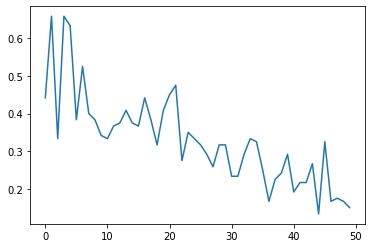

In [51]:
pyplot.plot(history.history['accuracy'])

In [52]:
y_pred_bool = np.argmax(maoo, axis=1)

In [53]:
y_pred_bool

array([0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 2], dtype=int64)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
print(classification_report(Y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.31      0.45      0.37        11
           1       0.25      0.14      0.18         7
           2       0.50      0.42      0.45        12

    accuracy                           0.37        30
   macro avg       0.35      0.34      0.34        30
weighted avg       0.37      0.37      0.36        30

